# Case Based Reasoning - Continuous Data

In [118]:
import pandas as pd
df = pd.read_csv('2019_kbo_hitter.csv')
df.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,���ȯ,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,����,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,���ȯ,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,����,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,���ȯ,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,����,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,���ȯ,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,����,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,���ȯ,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,����,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


In [119]:
drop_columns = ['batter_name','hand2','year_born','cp','tp']
df.dropna(axis=0, inplace=True)
df.drop(drop_columns, axis=1, inplace=True)
df

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,13.0,...,-0.055,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,28.0,...,-0.441,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,72.0,...,0.783,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,53.0,...,-0.405,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,3.0,...,-0.130,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,236.0,...,3.315,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,61.0,...,0.215,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,1.0,...,-0.271,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,141.0,...,2.365,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


In [120]:
df.describe()

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,26.929973,80.361273,265.480637,231.707692,34.473740,64.928382,11.491247,1.114589,6.451459,98.003183,...,1.310336,45.871088,27.941645,0.247706,0.317582,0.362364,0.679946,2012.041379,243.780371,0.680381
std,4.530901,43.730725,194.986358,169.735610,29.100893,52.812598,10.168305,1.768930,8.481615,84.548834,...,1.848115,36.842291,24.318913,0.087519,0.098075,0.153622,0.239738,6.006223,169.164973,0.217848
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.616000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,1.000000,0.000000
25%,24.000000,42.000000,68.000000,62.000000,8.000000,14.000000,2.000000,0.000000,0.000000,19.000000,...,-0.048000,10.000000,6.000000,0.219000,0.290000,0.295000,0.590000,2009.000000,78.000000,0.593000
50%,27.000000,92.000000,259.000000,226.000000,29.000000,59.000000,10.000000,0.000000,3.000000,82.000000,...,0.538000,42.000000,23.000000,0.263000,0.333000,0.373000,0.707000,2014.000000,248.000000,0.705000
75%,30.000000,119.000000,443.000000,386.000000,55.000000,109.000000,19.000000,2.000000,9.000000,163.000000,...,2.348000,77.000000,44.000000,0.295000,0.371000,0.448000,0.813000,2017.000000,398.000000,0.809000
max,41.000000,144.000000,672.000000,576.000000,135.000000,201.000000,47.000000,17.000000,54.000000,373.000000,...,10.873000,142.000000,124.000000,1.000000,1.000000,3.000000,4.000000,2019.000000,576.000000,2.000000


In [121]:
y = df['salary']
x = df.drop(['salary'],axis=1)
y

0        2500
1        2900
2        6000
3        6000
4        5500
        ...  
1908    30000
1909     3100
1910     6200
1911    50000
1912    50000
Name: salary, Length: 1885, dtype: int64

In [122]:
x

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,13.0,...,-0.055,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,28.0,...,-0.441,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,72.0,...,0.783,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,53.0,...,-0.405,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,3.0,...,-0.130,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,236.0,...,3.315,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,61.0,...,0.215,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,1.0,...,-0.271,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,141.0,...,2.365,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index = x.index)
x

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,-0.646836,-1.243421,-1.064360,-1.059032,-1.047453,-1.059278,-0.736921,-0.630259,-0.760842,-1.005641,...,-0.738968,-1.109647,-0.902486,-0.853822,-0.597482,-0.731624,-0.713245,0.326185,-0.974339,-0.460906
1,-0.426071,-0.763082,-0.920722,-0.899918,-0.909964,-0.964578,-0.933663,-0.630259,-0.289109,-0.828181,...,-0.947885,-1.028197,-0.943617,-0.808105,-0.934049,-0.054459,-0.417010,0.492723,-0.530868,0.475775
2,-0.205306,-0.351363,-0.453899,-0.457938,-0.428751,-0.547901,-0.540179,-0.630259,0.418491,-0.307634,...,-0.285413,-0.702398,-0.326649,-0.156643,-0.016140,0.687818,0.434146,0.659261,-0.412608,-0.456315
3,0.015459,-0.008264,-0.341041,-0.340076,-0.772475,-0.585780,-0.441808,-0.630259,-0.289109,-0.532416,...,-0.928400,-0.620948,-0.326649,-0.602380,-0.424100,-0.373508,-0.412837,0.825800,-1.340943,-0.938430
4,0.236225,-1.495027,-1.259297,-1.265289,-1.116198,-1.172917,-1.130404,-0.630259,-0.760842,-1.123947,...,-0.779561,-1.163947,-1.025879,-0.819534,-0.179324,-1.213453,-0.850932,0.992338,-1.163554,0.048758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,1.119286,1.089654,1.423653,1.457313,1.358609,1.497609,1.820723,-0.064796,1.597825,1.632588,...,1.084995,1.279546,1.277466,0.609110,0.575402,0.850598,0.780449,1.158876,0.894155,0.402309
1909,0.236225,-0.282743,-0.207663,-0.239894,-0.016284,-0.244862,-0.441808,-0.064796,-0.760842,-0.437771,...,-0.592835,-0.050800,0.002400,0.277665,0.483611,-0.282351,0.016913,0.992338,-1.364595,-2.416916
1910,0.456990,-1.472154,-1.290077,-1.288862,-1.047453,-1.210797,-1.130404,-0.630259,-0.760842,-1.147608,...,-0.855875,-1.218247,-1.149273,-1.951021,-2.453699,-1.858063,-2.194422,1.158876,-0.329827,0.181914
1911,0.015459,-0.236996,0.171952,0.278697,0.086833,0.418034,0.541901,0.500668,0.536425,0.508679,...,0.570822,0.302149,-0.491174,0.734831,0.269432,0.928732,0.705347,0.659261,1.651014,0.957890


In [124]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 2021)

In [125]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3, weights='distance')
regressor.fit(train_x, train_y)
pred_y = regressor.predict(valid_x)
pred_y

array([ 57847.336364  ,   3754.38397118,  10569.17319371,   5195.73233821,
         2553.51909592,   4027.22101751,  10026.7286869 ,  18644.01873432,
         4357.10292425,   4181.75253203,  10120.75644599,   2280.63663853,
         7776.09659301,   8298.38216455,   5604.88024666,   5224.22247215,
         2384.34409196,   2753.29727138,  14763.19542546,  21702.50174479,
        16001.98485539,  15714.55451375,  13220.43041258,  95869.21293018,
        19443.96644633,  27618.386104  ,   3085.96892104,  14022.37573133,
        35133.07040308,   3152.36212879,   6325.10827458,  14650.14245639,
         4367.75712845,  31953.00539402,   2337.96791666,  11426.69547918,
         5214.29698554,  14048.36613925,   7816.36389986,   3052.05297384,
         8646.59776743,  40628.15901197,   2337.68979442,  16461.24005878,
         5163.13550578,  74532.03203846,  11286.40027188,  17455.92401712,
        11942.8396554 ,  44343.39016928,   2679.54675068,   4426.63715205,
         5074.25416591,  

In [126]:
from sklearn import svm, metrics
metrics.mean_squared_error(valid_y, pred_y)

265266303.95771104

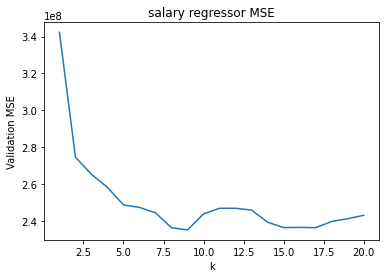

In [127]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
k_list = range(1,21) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance")
  regressor_k.fit(train_x, train_y)
  mses.append(metrics.mean_squared_error(valid_y, regressor_k.predict(valid_x)))
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("salary regressor MSE")
plt.show()

In [128]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 9, weights = "distance")
regressor.fit(train_x, train_y)
pred_y = regressor.predict(valid_x)
pred_y

array([ 65778.50241933,   3540.09593478,   6470.84438445,   4597.60366552,
         3376.54487894,   6416.06526322,   9328.34098125,  15223.46684871,
         6384.5007631 ,   4563.87750528,   9786.07502272,   2331.67275517,
         7718.49114037,  12252.23339178,   8396.88125921,   4571.72144617,
         2502.16866117,   2887.19897979,  12803.46947244,  23180.38514606,
        26834.33749901,  12447.28674319,  12474.51332031,  65259.4807287 ,
        15411.75073798,  19990.29998847,   3384.19977042,  32004.06878436,
        30866.85733743,   2864.05950696,   7987.05716926,   9234.20709305,
         3483.64446383,  31194.08819355,   2376.70148968,   9347.18777512,
         9268.64896193,  24330.25440754,  10664.69647942,   4214.65651468,
        14443.64740899,  31663.39340079,   2206.31894192,  25820.20753346,
         5736.67280259,  51634.04863333,   9634.79845949,  29084.74008235,
        16759.89786217,  54990.494608  ,   2693.37712733,   4157.92897332,
         5890.09338414,  

In [129]:
# MSE, RMSE 구하는 법 1
from sklearn import svm, metrics
from math import sqrt
mse = metrics.mean_squared_error(valid_y, pred_y)
rmse = sqrt(metrics.mean_squared_error(valid_y, pred_y))

print(mse)
print(rmse)

235114252.02818453
15333.435754200184


In [130]:
# MSE, RMSE 구하는 법 2
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(valid_y, pred_y)
RMSE = mean_squared_error(valid_y, pred_y)**0.5 # 또는 sqrt(mean_squared_error(valid_y, pred_y))

print(MSE)
print(RMSE)


235114252.02818453
15333.435754200184
